In [1]:
%let Path = E:\Data\DataQuest\Spotify;
%let Name = global_rankings.csv;
%let separateur = \;

%let NameFile = &Path.&separateur.&Name

SAS Connection established. Subprocess id is 3925



In [3]:
%put --> NameFile : &NameFile

In [8]:
%let SpotiFile = wlobal_rankings.csv

In [13]:
 PROC IMPORT DATAFILE="&SpotiFile"
  OUT=Work.essai
  DBMS=CSV  REPLACE;
  GETNAMES=YES;
  DELIMITER=',';
  GUESSINGROWS=10000;
RUN;
  

In [14]:
PROC CONTENTS DATA=work.essai;
RUN;

In [15]:
PROC print data=work.essai (obs=5);
RUN;

In [27]:
proc sql;
select max(date),min(date) into : max_date, : min_date from work.essai;
RUN;


In [32]:
DATA Work.Palmares(keep=Position 'Track Name'n Artist Streams Date number_days number_days_max number_days_min);
SET work.essai;
number_days = intck('day',Date,Date());
number_days_max = intck('day',Date,&max_date);
number_days_min = intck('day',&min_date,Date);
RUN;

In [33]:
PROC print data = work.palmares (obs=5);
RUN;

In [40]:
Data abscisse_degradee (keep=Position 'Track Name'n Artist Streams Date abscisse number_days_max);
set work.palmares;
if number_days_max = 0 then abscisse='0 - Current Day';
if number_days_max = 1 then abscisse='1 - Day One';
if number_days_max = 2 then abscisse='2 - Day Two';
if number_days_max = 3 then abscisse='3 - Day Three';
if number_days_max = 4 then abscisse='4 - Day Four';
if number_days_max = 5 then abscisse='5 - Day Five';
if number_days_max = 6 then abscisse='6 - Day Six';
if number_days_max >6 and number_days_max < 14 then abscisse='7 - Week 1';
if number_days_max >=14 and number_days_max < 21 then abscisse='8 - Week 2';
if number_days_max >=21 and number_days_max < 28 then abscisse='9 - Week 3';
if number_days_max >=28 and number_days_max < 60 then abscisse='10 - Month 2';
if number_days_max >=60 and number_days_max < 90 then abscisse='11 - Month 3';
if number_days_max >=90 and number_days_max < 180 then abscisse='12 - Quarter 2';
if number_days_max >=180 and number_days_max < 270 then abscisse='13 - Quarter 3';
if number_days_max >=270 and number_days_max < 360 then abscisse='14 - Quarter 4';
if number_days_max >=360 and number_days_max < 720 then abscisse='15 - Year 2';
RUN;



In [41]:
proc print data=work.abscisse_degradee (obs=5);
run;


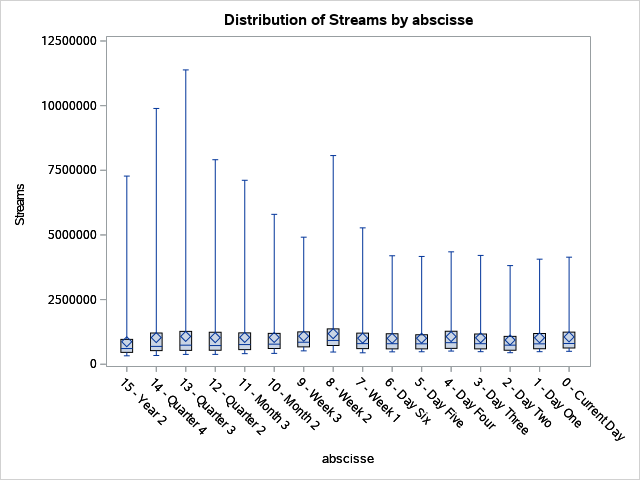

In [42]:
PROC BoxPlot data=work.abscisse_degradee;
Plot streams * abscisse;
RUN;


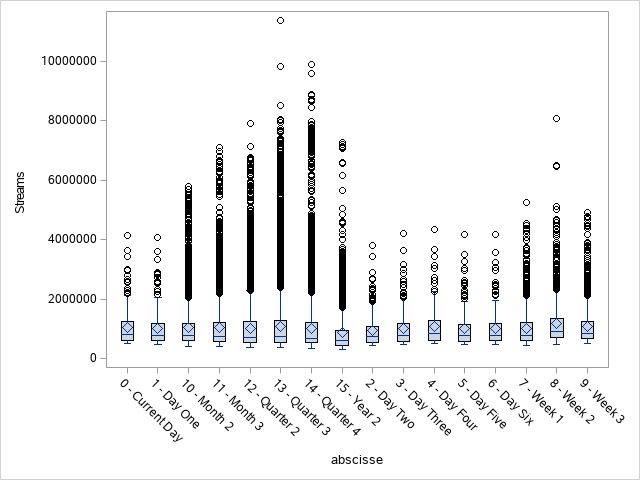

In [43]:
PROC SGPLOT data=work.abscisse_degradee;
vBox streams / category=abscisse;
RUN;


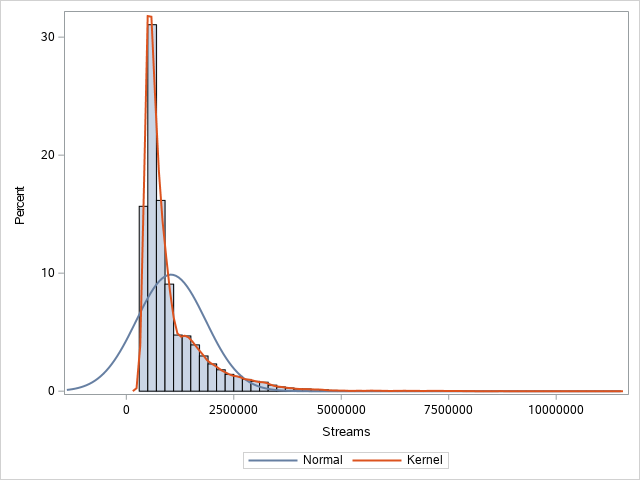

In [44]:
PROC SGPLOT data=work.abscisse_degradee;
histogram streams;
density streams;
density streams / type=kernel;
RUN;

In [57]:
proc sort data=work.abscisse_degradee out=work.abscisse_deg;
by number_days_max;
run;

proc means data=work.abscisse_deg n median mean min max std var;
id number_days_max;
var streams;
run;


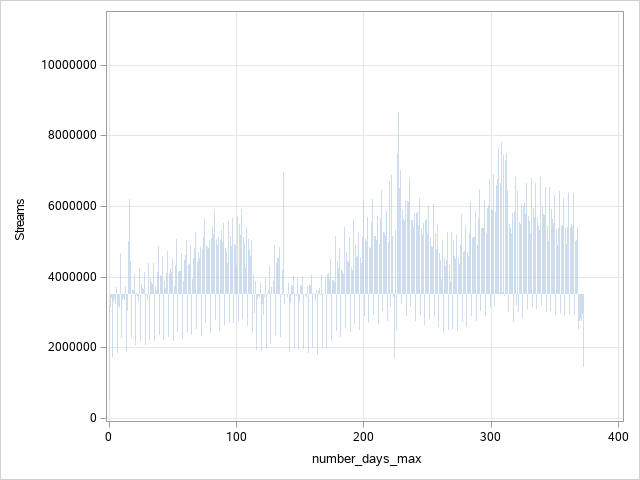

In [49]:
PROC SGPLOT data=work.abscisse_degradee;
yaxis grid;
xaxis grid;
band x=number_days_max lower=3500000 upper=streams / 
     transparency = 0.3;
RUN;




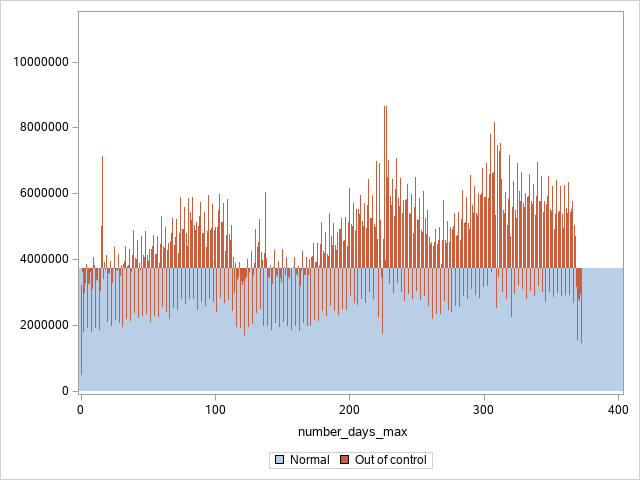

In [71]:
proc sgplot data=work.abscisse_degradee;
band upper=3750000 lower=0 x=number_days_max /  fillattrs=GraphConfidence legendlabel="Normal";
band upper=streams lower=3750000 x=number_days_max / fillattrs=GraphError legendlabel="Out of control";
RUN;


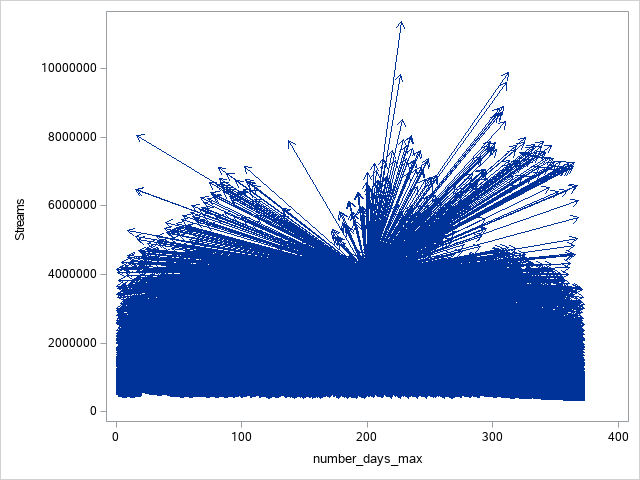

In [72]:
proc sgplot data=work.abscisse_degradee;
vector x=number_days_max y=streams / xorigin=200 yorigin=4000000;
run;

In [75]:
proc SQL;
create table work.abscisse_stats as
select number_days_max,
        mean(streams) as moy_streams,
        max(streams) as max_streams,
        min(streams) as min_streams,
        median(streams) as median_streams,
        count(streams) as number_streams
from work.abscisse_degradee
group by number_days_max;
RUN;

proc print data=work.abscisse_stats (obs=5);
RUN;


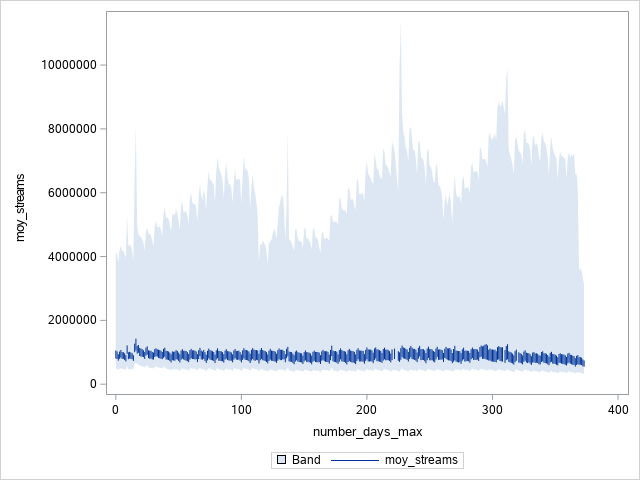

In [77]:
proc sgplot data=work.abscisse_stats;
    band lower=min_streams upper=max_streams x=number_days_max / transparency=0.5;
    vector x=number_days_max y=moy_streams / yorigin=median_streams xorigin=number_days_max noarrowheads;
run;    
             

In [78]:
data work.abscisse_degr;
set work.abscisse_degradee;
month_stream = month(date);
RUN;

proc print data=work.abscisse_degr (obs=5);
run;



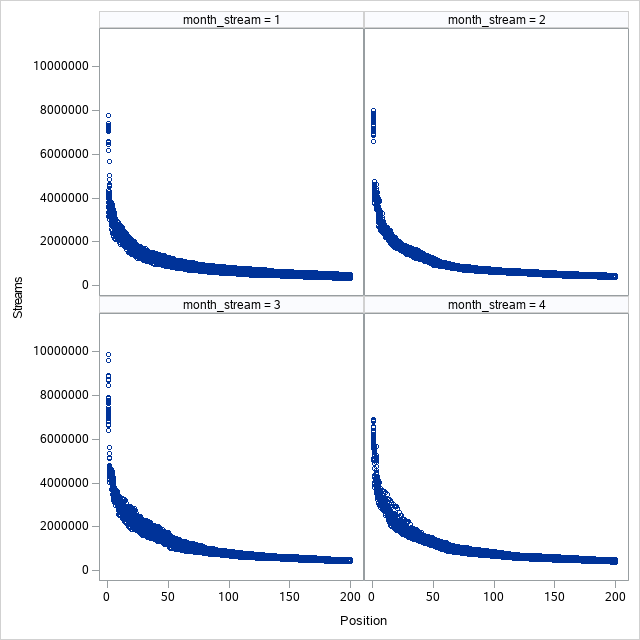
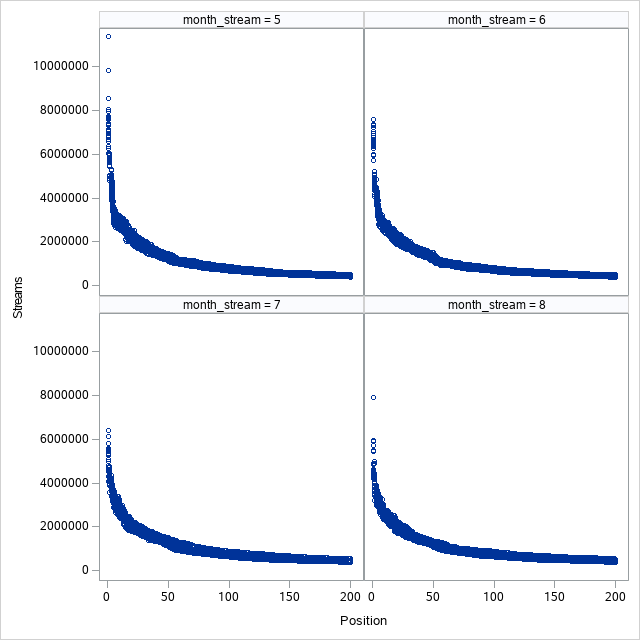
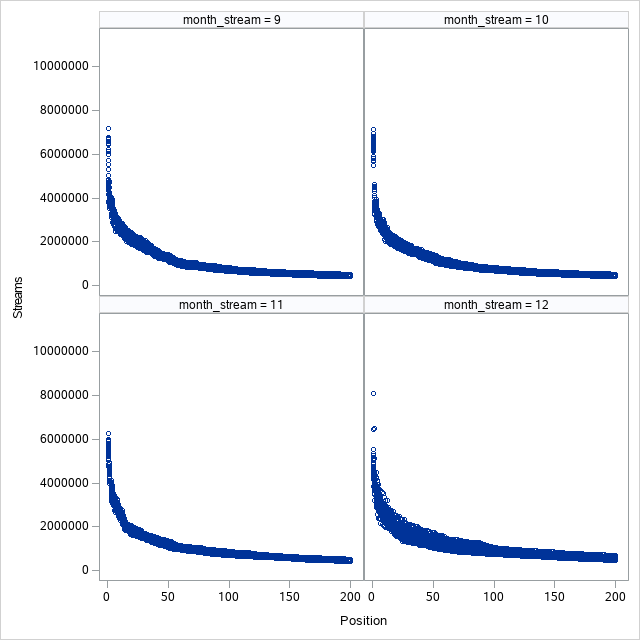

In [81]:
proc sgpanel data=work.abscisse_degr;
panelby month_stream;
scatter x=position y=streams;
run;


In [85]:
proc sql;
create table work.abscisse_month as
select month(number_days_max) as month_streams,
        mean(streams) as moy_streams,
        max(streams) as max_streams,
        min(streams) as min_streams,
        median(streams) as median_streams,
        count(streams) as number_streams
        from work.abscisse_degr
        group by month(number_days_max);
run;        


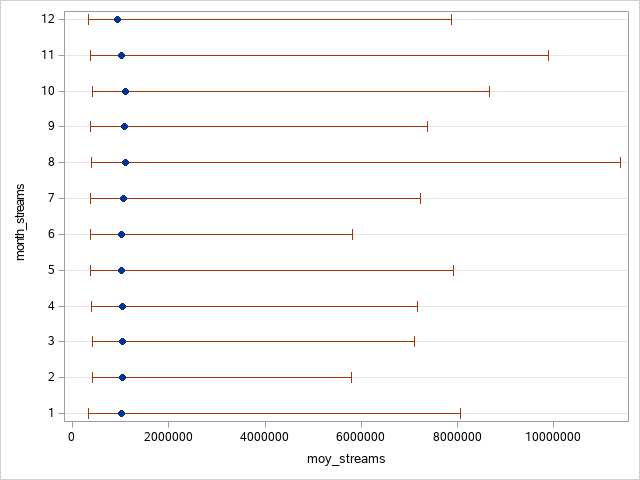

In [86]:
PROC sgplot data=work.abscisse_month;
yaxis grid type=discrete;
scatter y=month_streams x=moy_streams / markerattrs=(symbol=circlefilled)
    xerrorlower=min_streams
    xerrorupper=max_streams;
run;



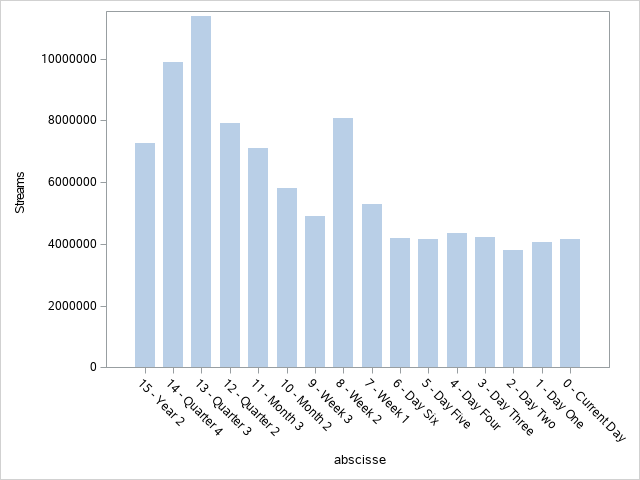

In [88]:
proc sgplot data=work.abscisse_degradee;
xaxis type=discrete;
needle x=abscisse y=streams / lineattrs=(color=cxB9CFE7 thickness=20);
run;


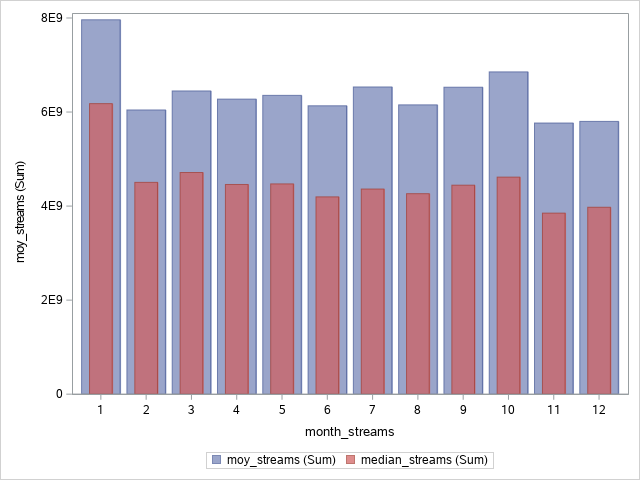

In [92]:
proc sgplot data=work.abscisse_month;
    vbar month_streams / response=moy_streams transparency=0.3;
    vbar month_streams / response=median_streams transparency=0.3 barwidth=0.5;
run;    


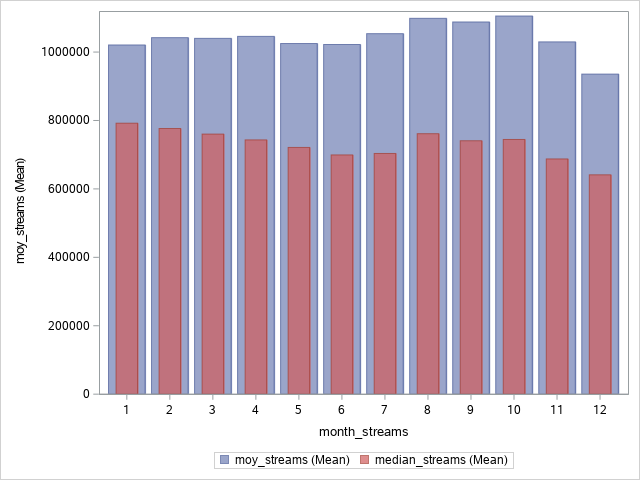

In [95]:
proc sgplot data=work.abscisse_month;
    vbar month_streams / response=moy_streams transparency=0.3 stat=MEAN;
    vbar month_streams / response=median_streams transparency=0.3 barwidth=0.5 stat=mean;
run; 


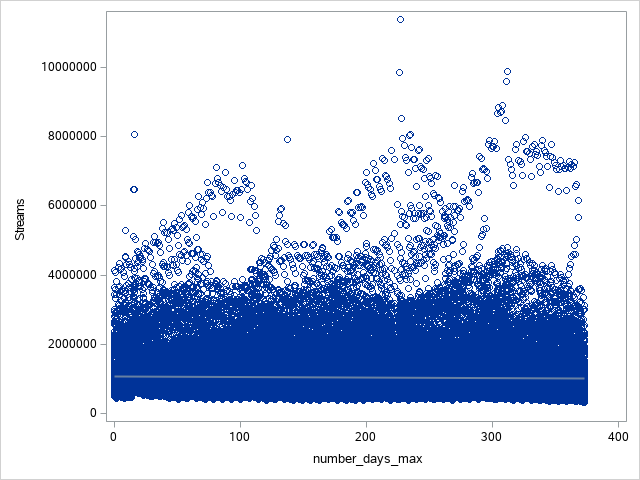

In [96]:
PROC sgscatter data=work.abscisse_degradee;
plot streams * number_days_max / reg=(nogroup);
run;

In [103]:
PROC FORMAT;
    value month_letter
        1='Janvier'
        2='Février'
        3='Mars'
        4='Avril'
        5='Mai'
        6='Juin'
        7='Juillet'
        8='Août'
        9='Septembre'
        10='Octobre'
        11='Novembre'
        12='Décembre';
RUN;        


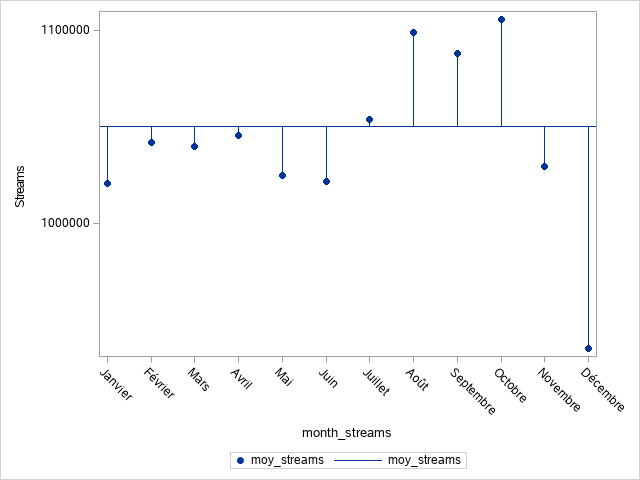

In [106]:
proc sgplot data=work.abscisse_month;
format month_streams month_letter.;
xaxis type=discrete;
yaxis values=(900000 to 1200000 by 100000) valueshint label="Streams";
scatter x=month_streams y=moy_streams / markerattrs=(symbol=circlefilled);
needle x=month_streams y=moy_streams / baseline=1050000;
run;



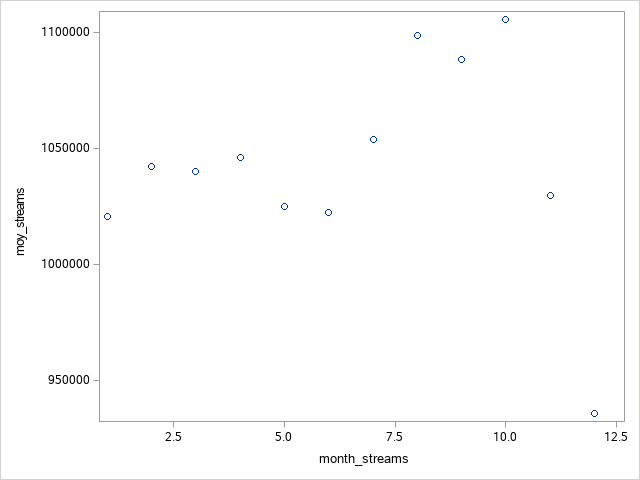

In [110]:
proc sgplot data=abscisse_month;
loess x=month_streams y=moy_streams / clm;
run;



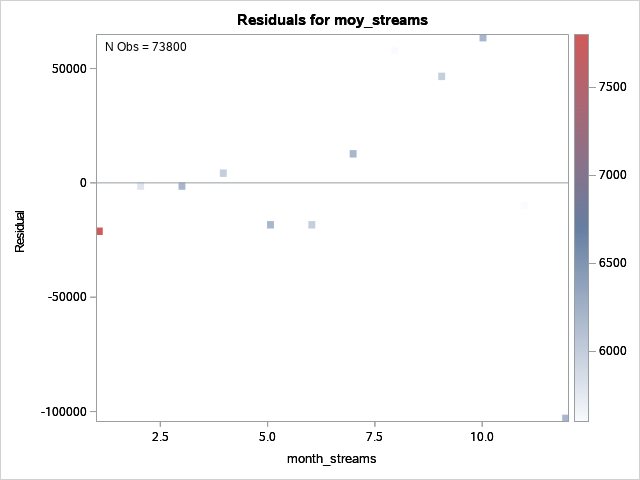
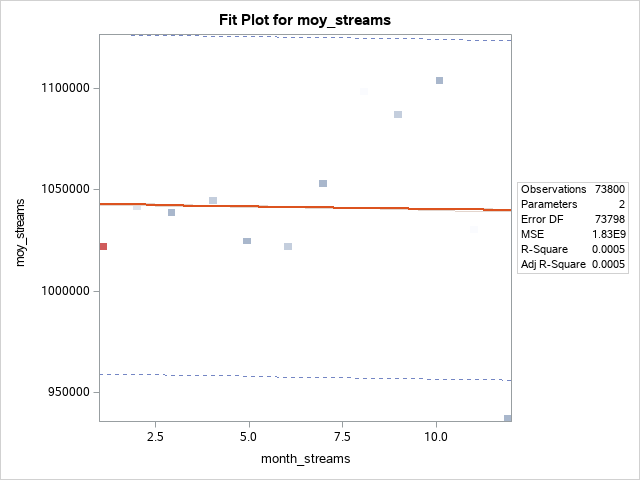

In [113]:
proc reg data=work.abscisse_month;
model moy_streams = month_streams;
run;



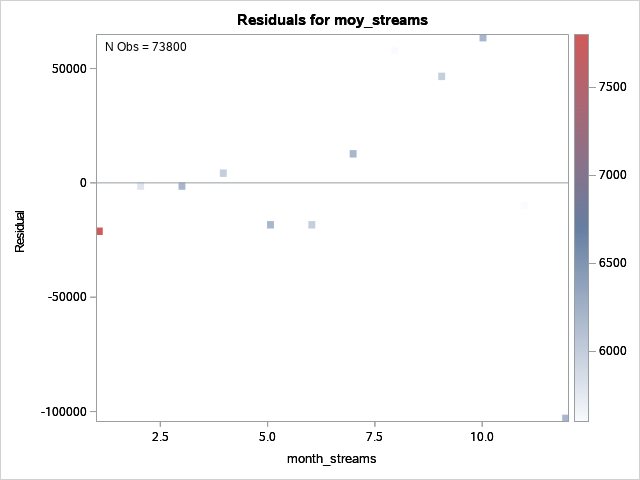
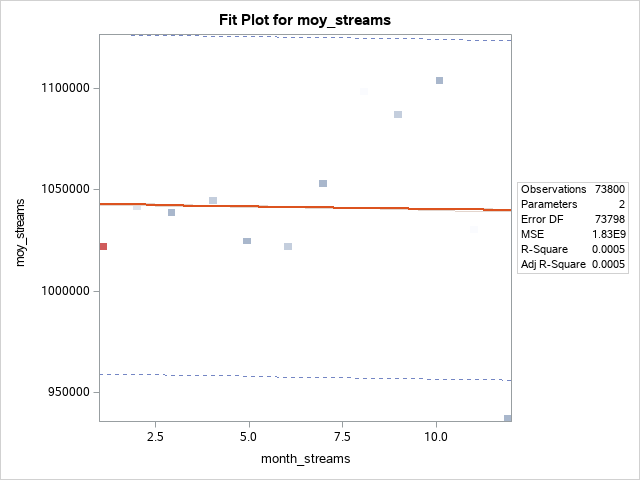

In [114]:
proc reg data=work.abscisse_month;
model moy_streams = month_streams / ss1 ss2 stb clb covb corrb;
run;


In [115]:
proc pareto data=work.abscisse_degradee;
   vbar streams / freq  = Counts
                angle = -60;
   by artist;
run;

In [119]:
proc product_status;


In [120]:
proc sort data=work.abscisse_degradee out=work.abscisse_sorted;
by artist;
run;

In [121]:
proc print data=work.abscisse_sorted (obs=5);
run;

In [144]:
data work.nb_songs;
set work.abscisse_sorted;
retain number_song;
if artist = lag(artist) then number_song=number_song+1; else number_song=1;
run;


In [145]:
PROC means data=work.nb_songs max min n mean median;
var number_song;
run;

In [146]:
data work.nb_songs_clean;
set work.nb_songs;
if not missing(artist) then output;
run;

In [147]:
proc print data=work.nb_songs_clean (obs=20);
run;

In [159]:
proc  sort data=work.nb_songs_clean output=work.nb_songs_clean_sorted;
by 'track name'n date;
run;


In [172]:
data work.nb_songs_evol;
set work.nb_songs_clean_sorted;
by 'track name'n;
/*if 'track name'n = lag('track name'n) then delta_song = streams - lag(streams);else delta_song=0;*/
cumul = streams - lag(streams);
if 'track name'n ^= lag('track name'n) then delta_song = 0;
else delta_song=cumul;
run;

In [173]:
proc print data=work.nb_songs_evol (obs=525);
run;

In [179]:
data work.song_stats (keep=artist date track total_stream number_song total_position);
set work.nb_songs_evol;
by 'track name'n;
if 'track name'n ^= lag('track name'n) then do total_stream = 0;total_position=0;end;
total_stream + streams;
total_position + position;
track='track name'n;
run;


In [181]:
proc sort data=work.song_stats out=work.song_stats_sorted;
by track date;
run;

In [186]:
data work.final (keep=artist track total_stream position_moy number_song);
set work.song_stats;
by track;
position_moy = ceil(total_position / number_song);
if last.track then output;
run;


In [187]:
proc print data=work.final (obs=150);
run;

In [191]:
proc sort data=work.final out=work.final_sort;
by descending total_stream ;
run;

In [192]:
proc print data=work.final_sort;
run;


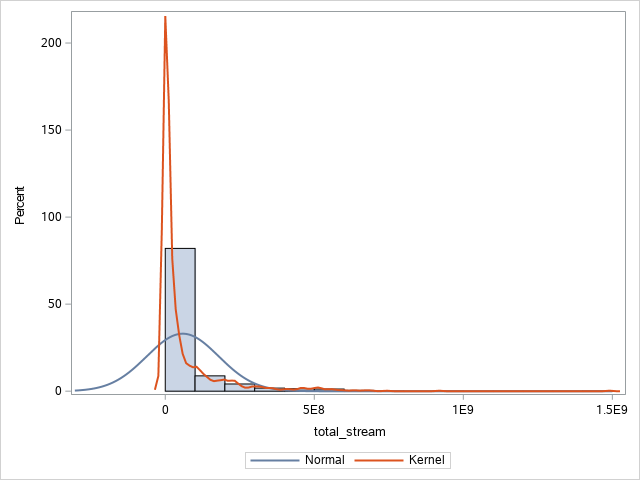

In [193]:
PROC SGPLOT data=work.final_sort;
histogram total_stream;
density total_stream;
density total_stream / type=kernel;
RUN;


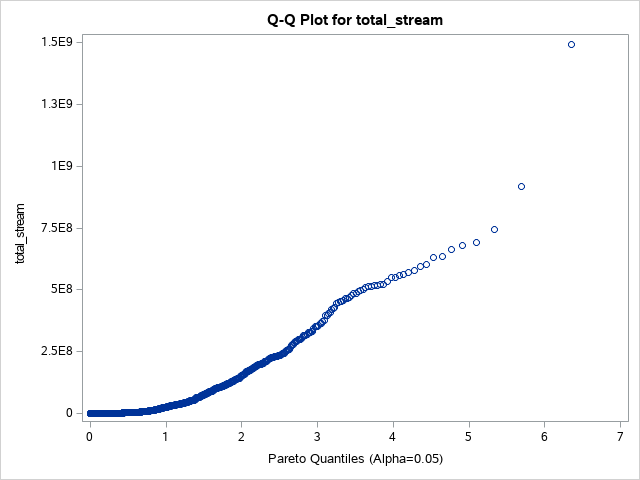

In [194]:
proc univariate data=work.final_sort;
qqplot total_stream / pareto (alpha=0.05);
run;


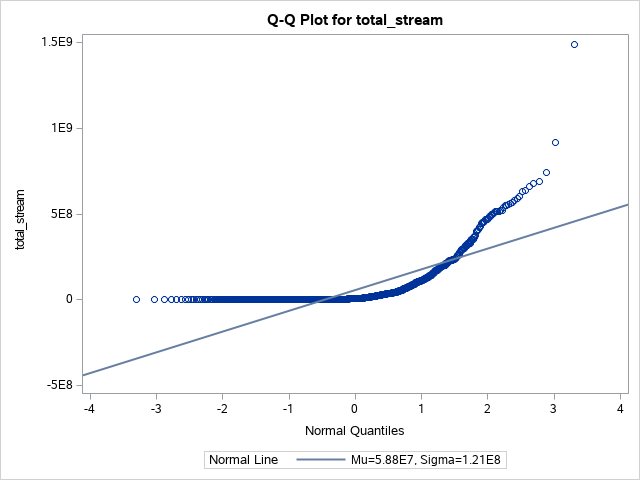

In [199]:
proc univariate data=work.final_sort noprint;
qqplot total_stream / normal(mu=58777602 sigma=120653728);
run;


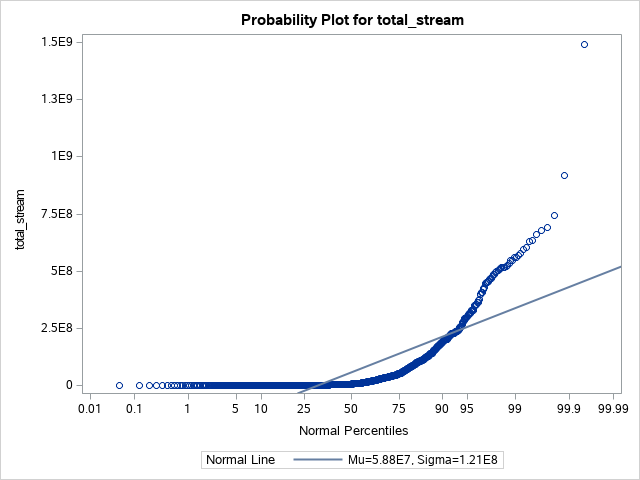

In [202]:
proc univariate data=work.final_sort noprint;
probplot total_stream / normal(mu=58777602 sigma=120653728);
run;

In [205]:
proc sql;
select mean(total_stream),std(total_stream) into : moy, :ect from work.final_sort;
run;


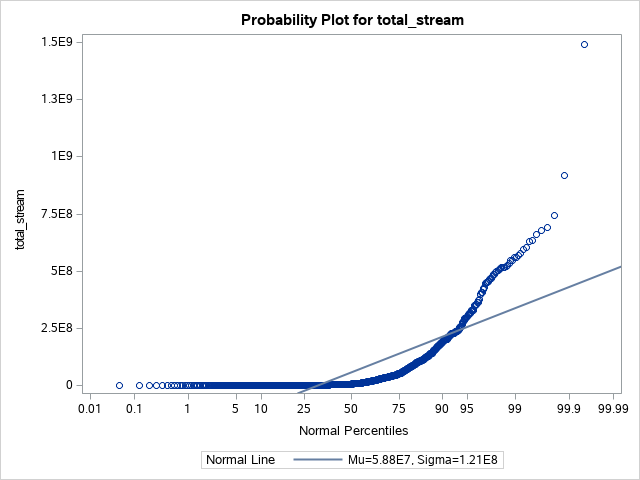

In [206]:
proc univariate data=work.final_sort noprint;
probplot total_stream / normal(mu=&moy sigma=&ect);
run;

In [211]:
proc sql;
select sum(total_stream),count(track) into : global_stream, : global_track from work.final_sort;
run;

data work.pareto;
set work.final_sort;
retain cumul_stream;
nb_artist = _n_;
if _n_=1 then cumul_stream=0;
cumul_stream+total_stream;
ratio_stream=cumul_stream/&global_stream;
ratio_artist=nb_artist/&global_track;
run;



In [212]:
proc print data=work.pareto (obs=10);
run;


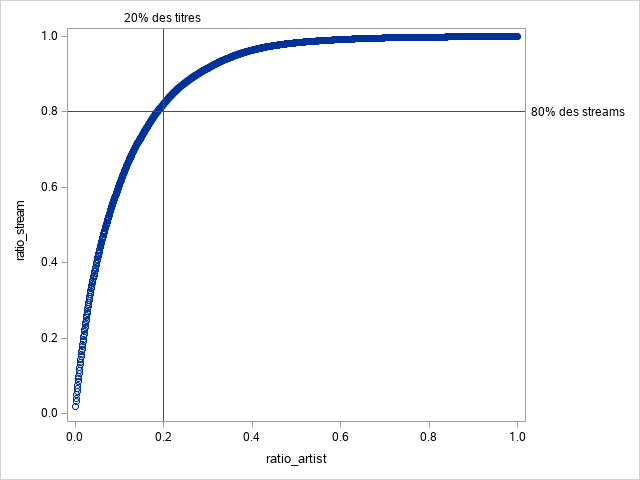

In [214]:
proc sgplot data=work.pareto;
scatter x=ratio_artist y=ratio_stream;
refline 0.8 / axis=y label='80% des streams' lineattrs=(color=red);
refline 0.2 / axis=x label='20% des titres' lineattrs=(color=red);
run;



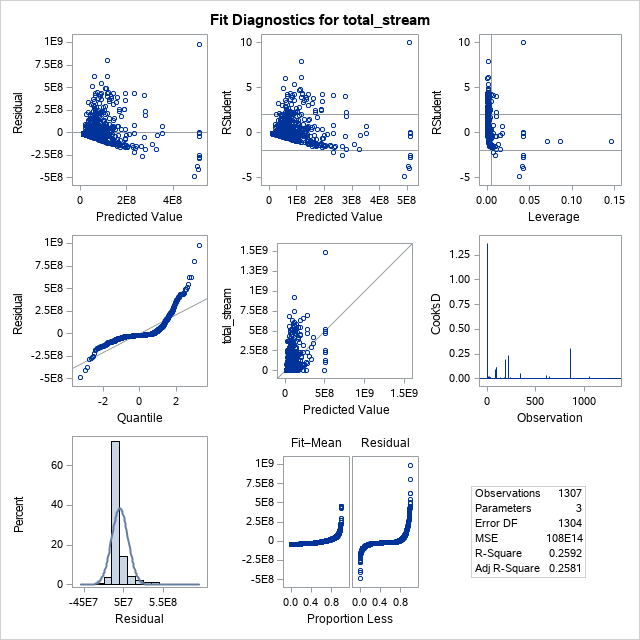
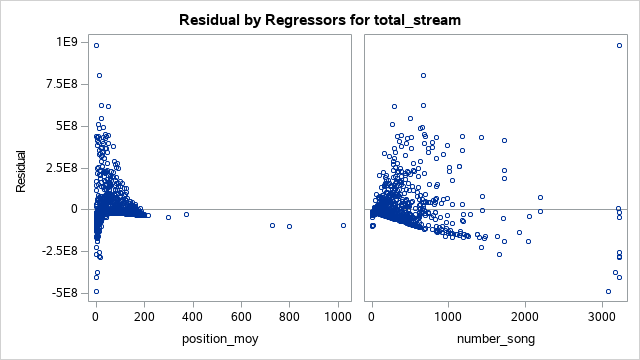

In [216]:
proc reg data=work.final_sort;
model total_stream = position_moy number_song / ss1 ss2 stb clb covb corrb;
run;


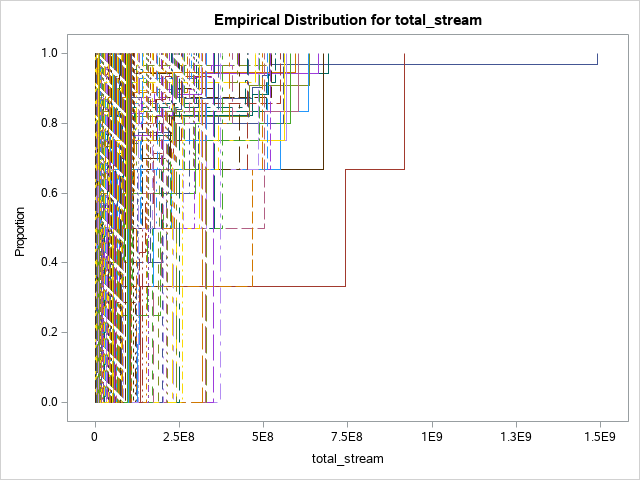

In [224]:
ods graphics on;
proc npar1way edf plots=edfplot data=work.final_sort;
class artist;
var total_stream;
run;
ods graphics off;


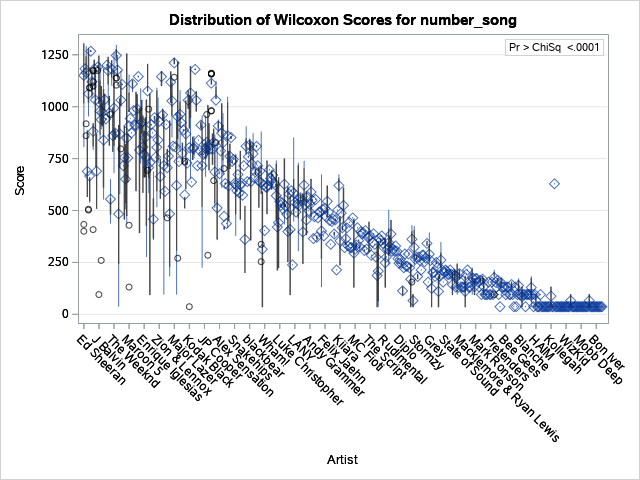
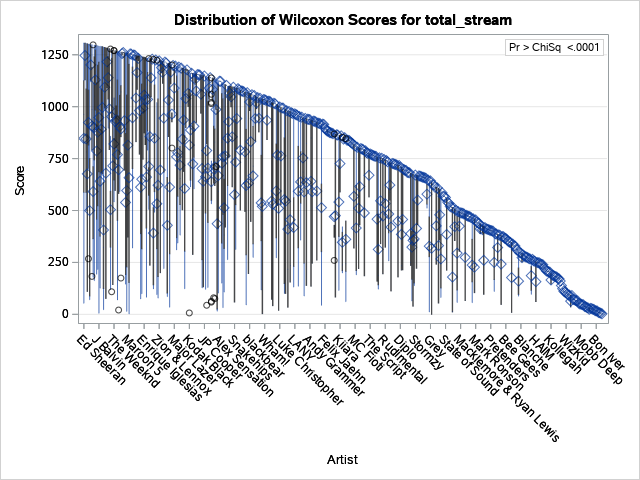
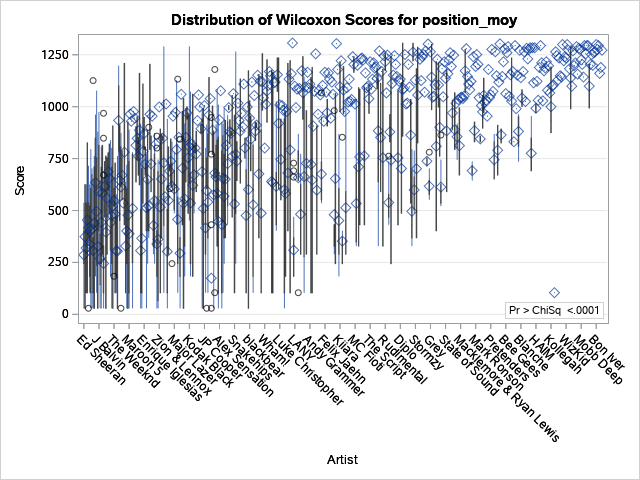

In [225]:
proc npar1way wilcoxon data=work.final_sort;
class artist;
run;

In [227]:
proc export data=work.pareto
    outfile="export.txt"
    dbms=dlm replace;
    delimiter=";";
run;


In [230]:
%macro ginfuzz(number);
    %let start=0;
    %do i = &start %to &number;
        %if %sysfunc(mod(i,15))=0 %then %do; %put 'Gin Fuzz Buzz'; %end;
        %else %do;
            %if %sysfunc(mod(i,3))=0 %then %do; %put 'Fuzz';%end;
            %else %do; %if %sysfunc(mod(i,5)=0 %then %do; %put 'Buzz';%end;
                        %else %do; %put'Gin'; %end;
            %end;
        %end;
    %end;
%mend ginfuzz;


Exception caught!
Processing interrupt
Attn handler Query is

Select:
  C. Cancel the dialog
  T. Terminate the SAS System

Please enter your Response: T
Secondary Query is:

Press 
  Y to terminate this SAS session, 
  N to continue.

Please enter your Response: Y
SAS process has terminated unexpectedly. Pid State= posix.waitid_result(si_pid=1457, si_uid=1002, si_signo=17, si_status=2, si_code=1) 
Restarting SAS session on your behalf
in shutdown function
Restarting kernel...
Done!


'SAS process has terminated unexpectedly. Pid State= posix.waitid_result(si_pid=1457, si_uid=1002, si_signo=17, si_status=2, si_code=1)'

In [229]:
%ginfuzz(100);

SAS Connection established. Subprocess id is 1457

